In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
titanic = pd.read_csv('/content/Titanic_train.csv')
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
718,719,0,3,"McEvoy, Mr. Michael",male,NaN,0,0,36568,15.5000,NaN,Q
573,574,1,3,"Kelly, Miss. Mary",female,NaN,0,0,14312,7.7500,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
464,465,0,3,"Maisner, Mr. Simon",male,NaN,0,0,A/S 2816,8.0500,NaN,S
727,728,1,3,"Mannion, Miss. Margareth",female,NaN,0,0,36866,7.7375,NaN,Q


In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# prompt: #find the % of missing values

# Calculate the percentage of missing values for each column
missing_percentages = titanic.isnull().sum() * 100 / len(titanic)

# Print the results
missing_percentages


,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Calculate the mean of the 'Age' column, excluding missing values
mean_age = titanic['Age'].mean()

# Fill missing 'Age' values with the calculated mean
titanic['Age'].fillna(mean_age, inplace=True)
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
titanic['Embarked'].isnull().sum()

np.int64(2)

In [11]:
titanic[titanic['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [12]:
titanic['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [13]:
titanic['Embarked'] = titanic['Embarked'].fillna('S')
titanic.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [14]:
#Finding unique values in the column and their respective coun
titanic['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [15]:
titanic['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


In [16]:
titanic['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [17]:
titanic['SibSp'].value_counts()

,count
SibSp,
0,608
1,209
2,28
4,18
3,16
8,7
5,5


In [18]:
titanic['Parch'].value_counts()

,count
Parch,
0,678
1,118
2,80
5,5
3,5
4,4
6,1


In [19]:
data = titanic['Survived'].value_counts().reset_index()
data

,Survived,count
0,0,549
1,1,342


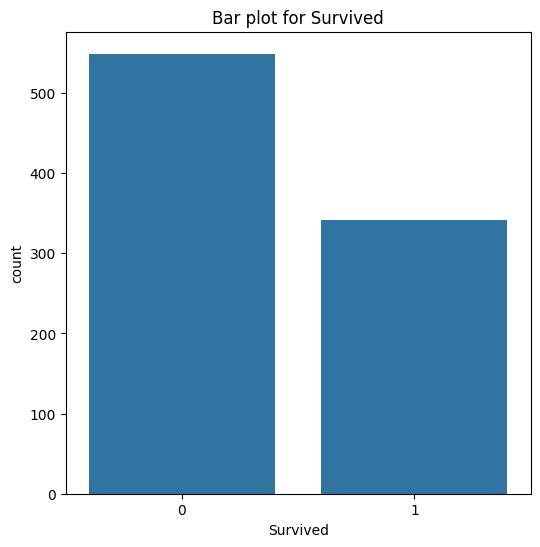

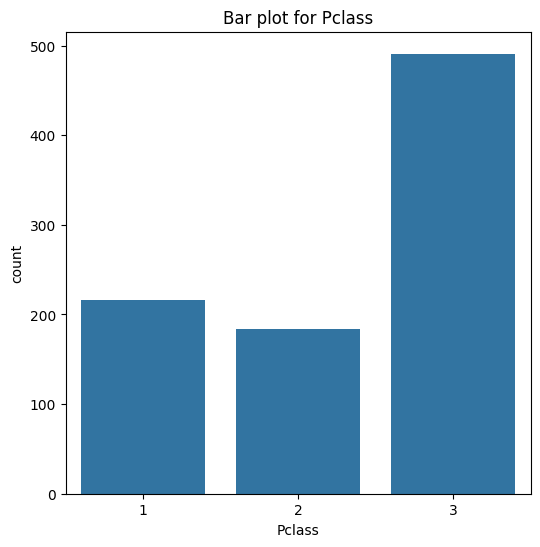

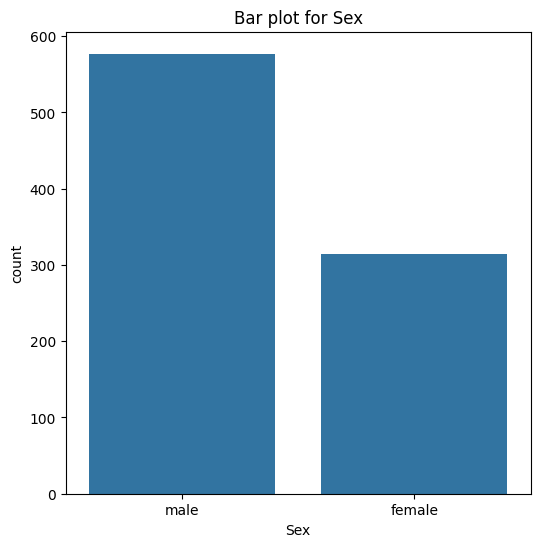

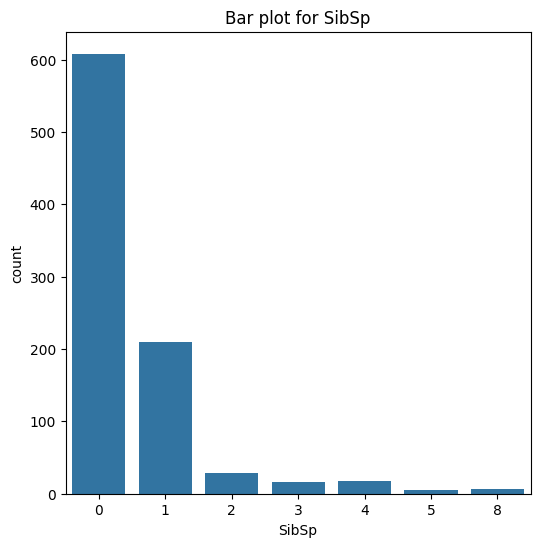

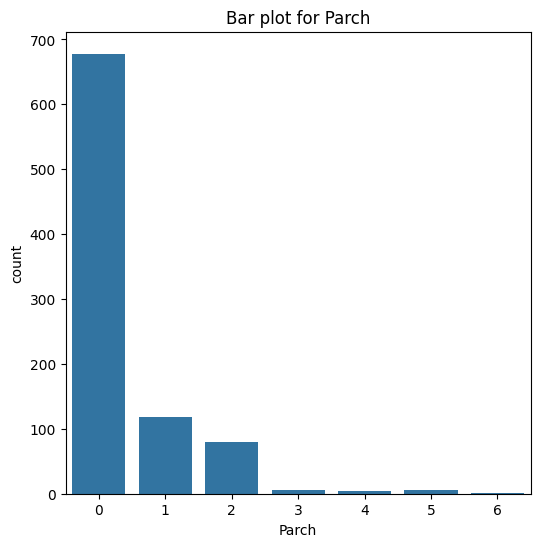

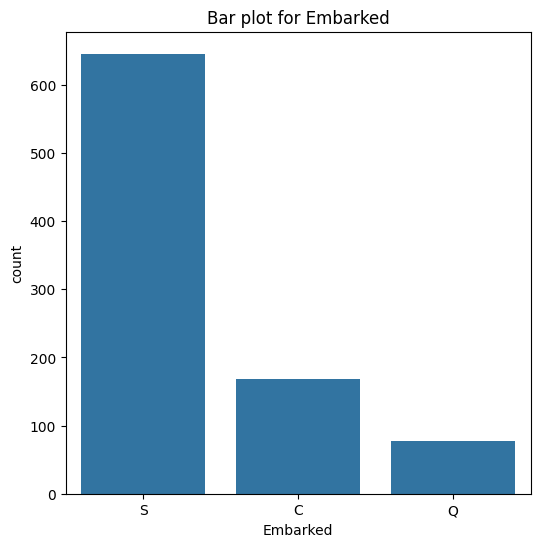

In [20]:
# prompt:  #Ploting bar plot for categorical columns

import matplotlib.pyplot as plt
# Plotting bar plot for 'Survived' column
plt.figure(figsize=(6, 6))
sns.countplot(x='Survived', data=titanic)
plt.title('Bar plot for Survived')
plt.show()

# Plotting bar plot for 'Pclass' column
plt.figure(figsize=(6, 6))
sns.countplot(x='Pclass', data=titanic)
plt.title('Bar plot for Pclass')
plt.show()

# Plotting bar plot for 'Sex' column
plt.figure(figsize=(6, 6))
sns.countplot(x='Sex', data=titanic)
plt.title('Bar plot for Sex')
plt.show()

# Plotting bar plot for 'SibSp' column
plt.figure(figsize=(6, 6))
sns.countplot(x='SibSp', data=titanic)
plt.title('Bar plot for SibSp')
plt.show()

# Plotting bar plot for 'Parch' column
plt.figure(figsize=(6, 6))
sns.countplot(x='Parch', data=titanic)
plt.title('Bar plot for Parch')
plt.show()

# Plotting bar plot for 'Embarked' column
plt.figure(figsize=(6, 6))
sns.countplot(x='Embarked', data=titanic)
plt.title('Bar plot for Embarked')
plt.show()


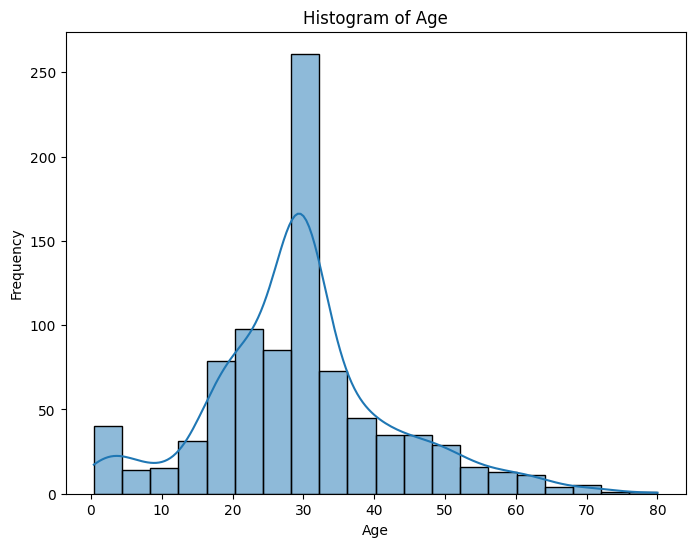

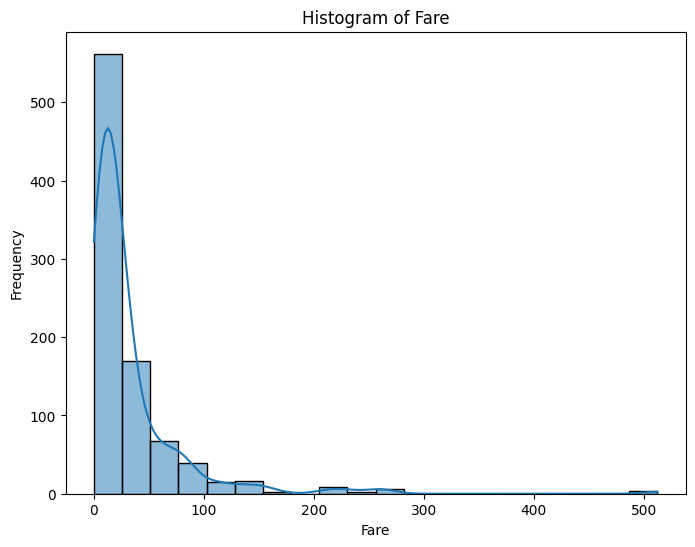

In [21]:
# prompt: #Ploting hostogram for continues variables

import matplotlib.pyplot as plt
# Plotting histogram for 'Age' column
plt.figure(figsize=(8, 6))
sns.histplot(titanic['Age'], bins=20, kde=True)  # Adjust bins as needed
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plotting histogram for 'Fare' column
plt.figure(figsize=(8, 6))
sns.histplot(titanic['Fare'], bins=20, kde=True)  # Adjust bins as needed
plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


In [22]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
# prompt: #Encoding columns which contains string values in their column

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate over the columns of the DataFrame
for col in titanic.columns:
    # Check if the column is of object type (string)
    if titanic[col].dtype == 'object':
        # Fit and transform the column using LabelEncoder
        titanic[col] = le.fit_transform(titanic[col])

titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2


In [24]:
!pip install klib

In [25]:
#correlation matrix using klib
import klib
klib.corr_mat(titanic)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.00,-0.01,-0.04,-0.04,0.04,0.03,-0.06,-0.00,-0.06,0.01,-0.04,0.01
Survived,-0.01,1.00,-0.34,-0.06,-0.54,-0.07,-0.04,0.08,-0.16,0.26,-0.25,-0.17
Pclass,-0.04,-0.34,1.00,0.05,0.13,-0.33,0.08,0.02,0.32,-0.55,0.68,0.16
Name,-0.04,-0.06,0.05,1.00,0.02,0.06,-0.02,-0.05,0.05,-0.05,0.06,-0.01
Sex,0.04,-0.54,0.13,0.02,1.00,0.08,-0.11,-0.25,0.06,-0.18,0.10,0.11
Age,0.03,-0.07,-0.33,0.06,0.08,1.00,-0.23,-0.18,-0.07,0.09,-0.24,-0.03
SibSp,-0.06,-0.04,0.08,-0.02,-0.11,-0.23,1.00,0.41,0.08,0.16,0.04,0.07
Parch,-0.00,0.08,0.02,-0.05,-0.25,-0.18,0.41,1.00,0.02,0.22,-0.03,0.04
Ticket,-0.06,-0.16,0.32,0.05,0.06,-0.07,0.08,0.02,1.00,-0.01,0.24,-0.00
Fare,0.01,0.26,-0.55,-0.05,-0.18,0.09,0.16,0.22,-0.01,1.00,-0.50,-0.22


Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

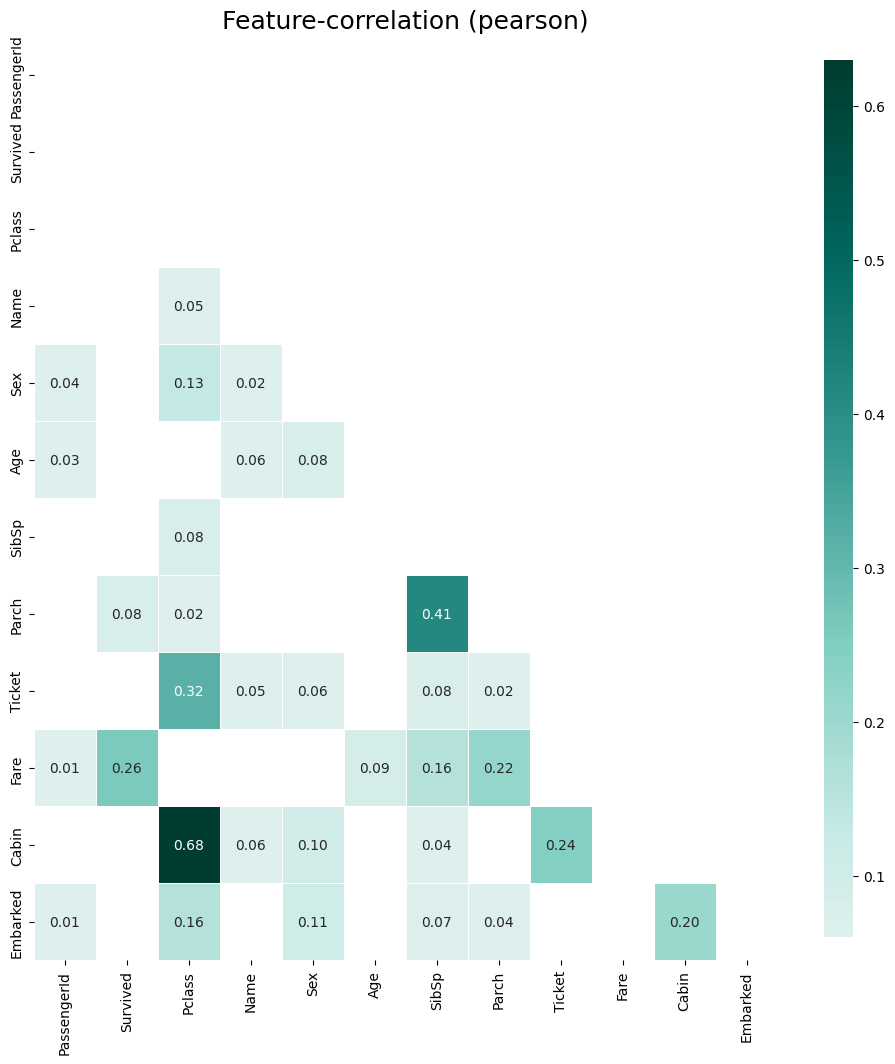

In [26]:
#correlation plot using klib
klib.corr_plot(titanic, split='pos', figsize=(12,12))


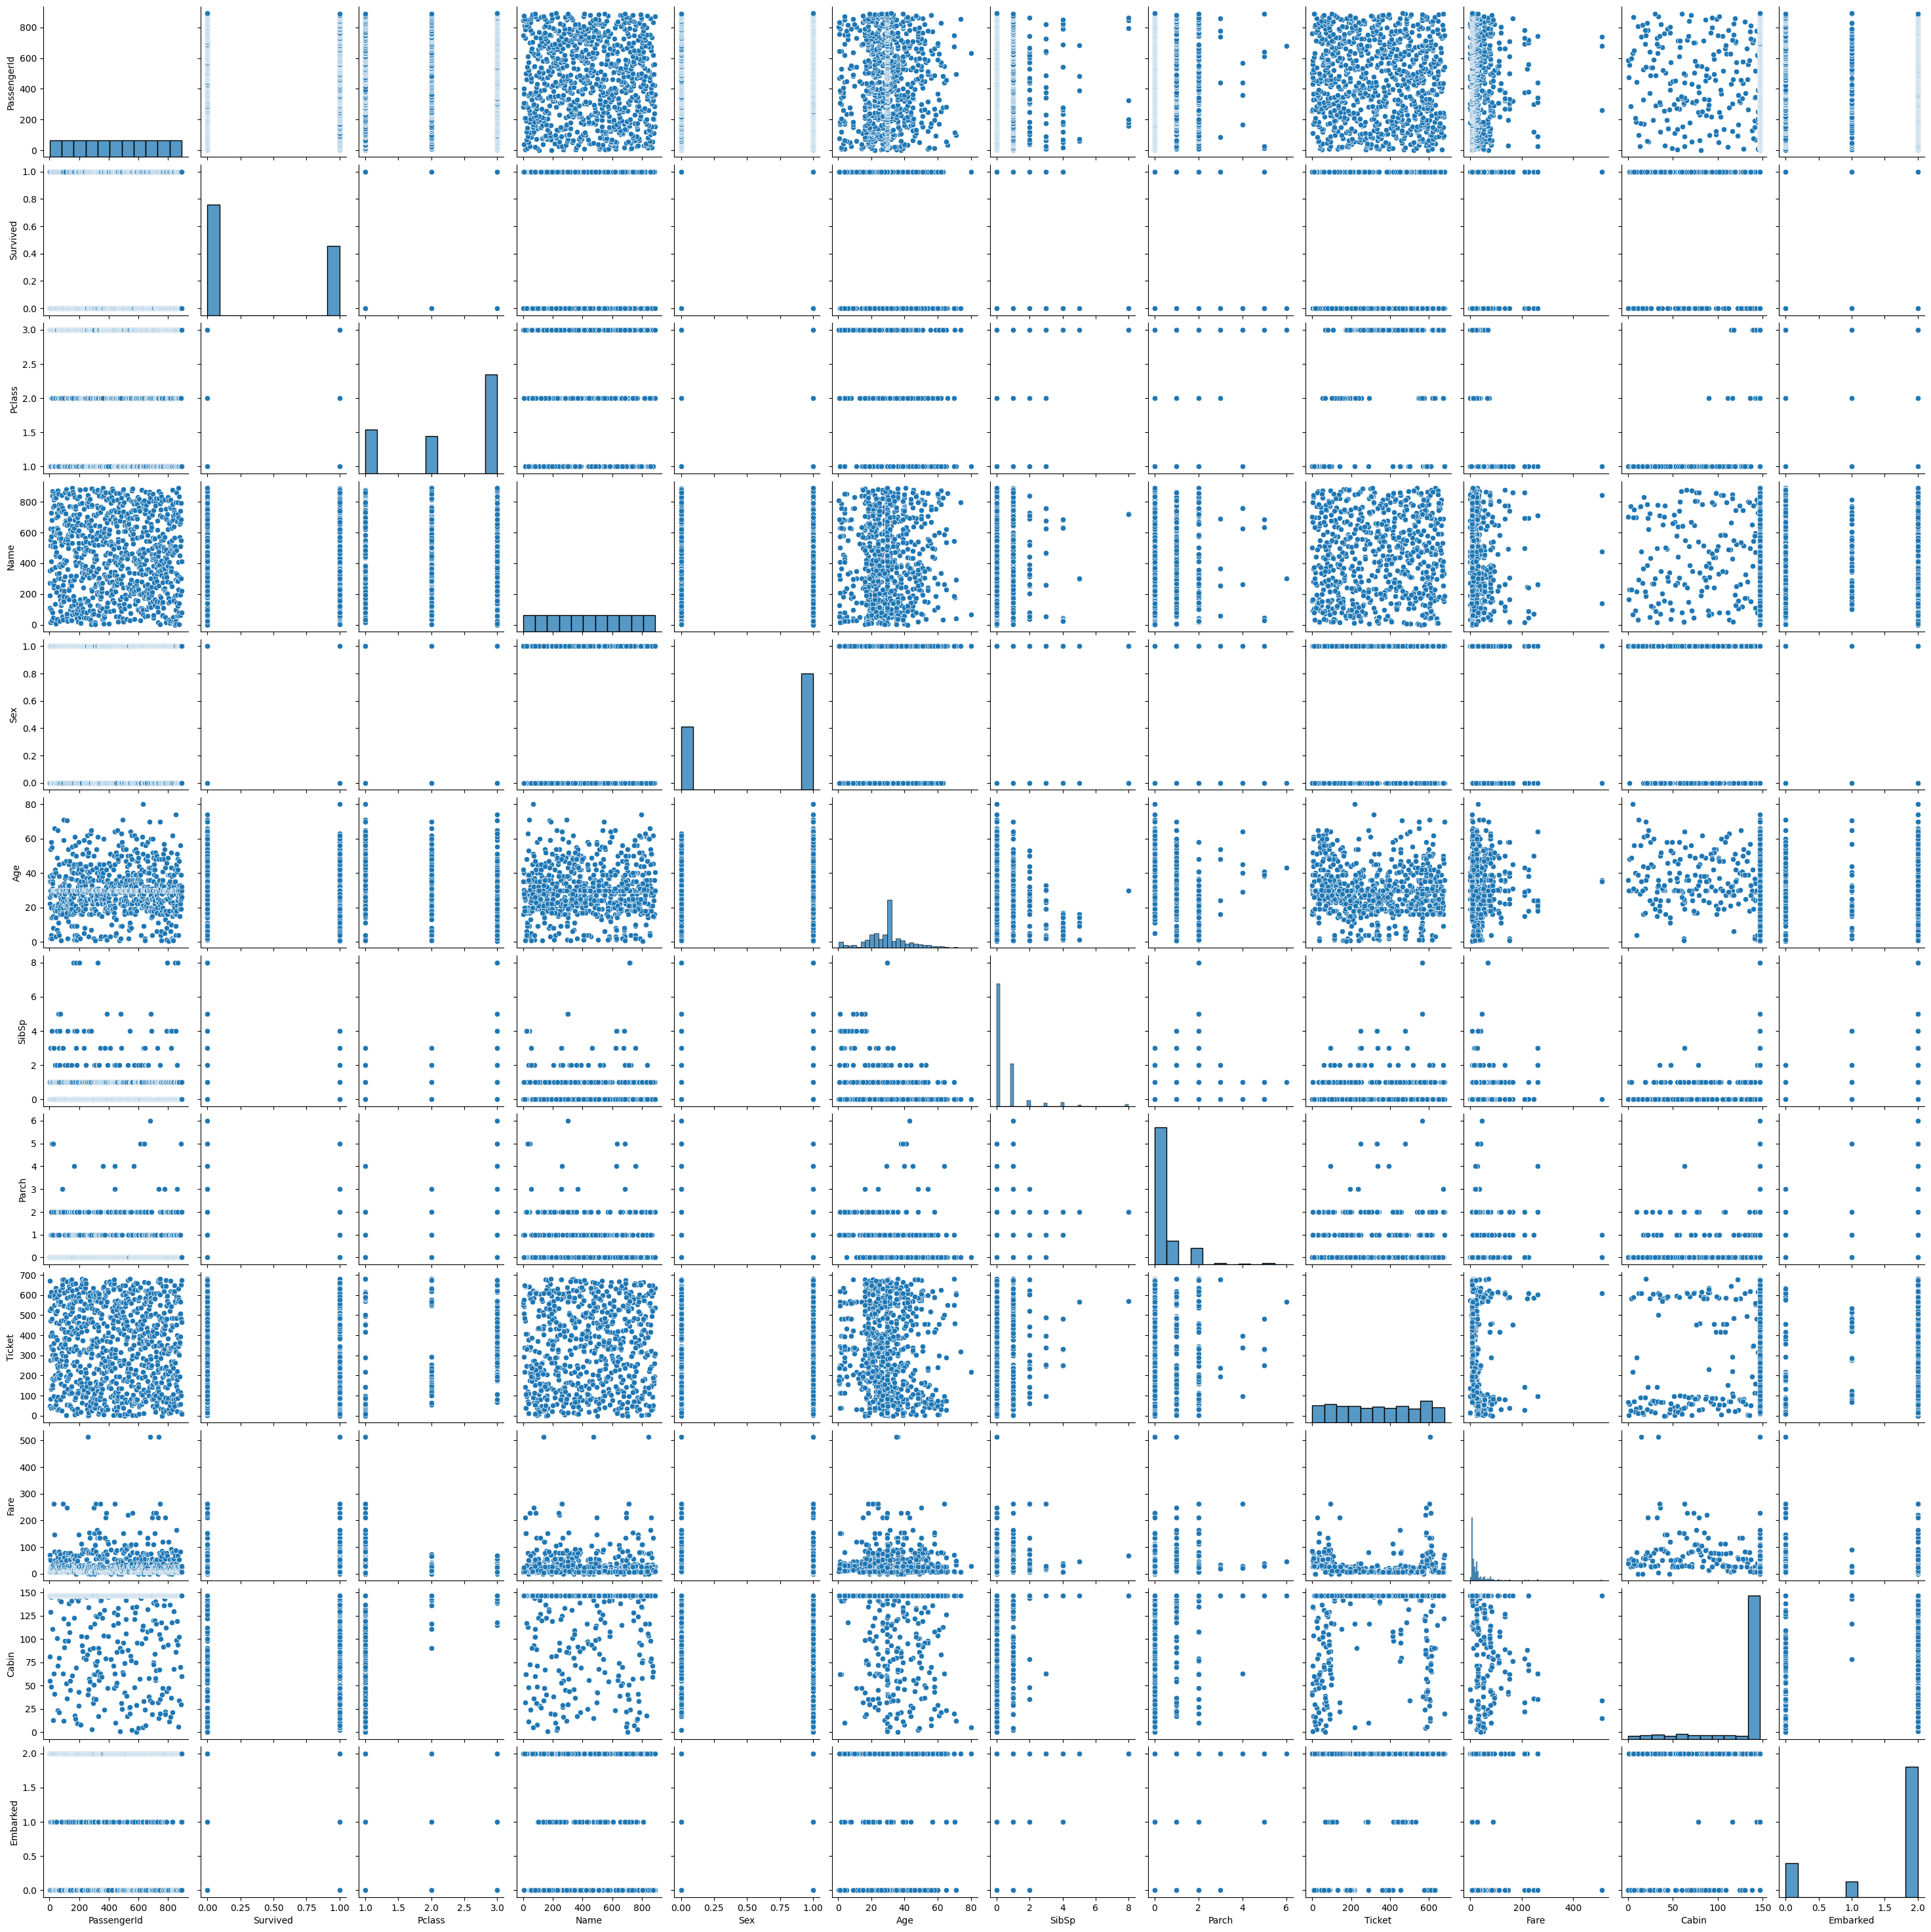

In [27]:
sns.pairplot(titanic)
plt.show()

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split

In [29]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2


In [30]:
X = titanic.drop('Survived',axis=1)
y = titanic['Survived']
print(X.shape,y.shape)

(891, 11) (891,)


In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [32]:
log_reg = LogisticRegression()
log_reg

LogisticRegression()

In [33]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [34]:
log_reg.coef_[0]

array([ 8.00565954e-04, -5.71914757e-01,  1.76359182e-04, -2.24918277e+00,
       -3.32210871e-03, -3.06298213e-01,  1.39664822e-01, -2.04023418e-04,
        1.14700070e-02,  1.03491731e-02, -3.71272923e-02])

In [35]:
Beta_coef = pd.Series(log_reg.coef_[0])
Beta_coef

,0
0,0.000801
1,-0.571915
2,0.000176
3,-2.249183
4,-0.003322
5,-0.306298
6,0.139665
7,-0.000204
8,0.011470
9,0.010349


In [36]:
coefficients = pd.DataFrame({'Columns':pd.Series(X.columns),
                             'Coefficients':pd.Series(log_reg.coef_[0])})
coefficients

,Columns,Coefficients
0,PassengerId,0.000801
1,Pclass,-0.571915
2,Name,0.000176
3,Sex,-2.249183
4,Age,-0.003322
5,SibSp,-0.306298
6,Parch,0.139665
7,Ticket,-0.000204
8,Fare,0.011470
9,Cabin,0.010349


In [37]:
log_reg.score(X_train,y_train)

0.7952443857331571

In [38]:
log_reg.score(X_test,y_test)

0.7686567164179104

In [39]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1])

In [40]:
print("Accuracy Score for Logistic Regression is", accuracy_score(y_test,y_pred))

Accuracy Score for Logistic Regression is 0.7686567164179104


In [41]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[66, 12],
       [19, 37]])

In [42]:
px.imshow(conf_matrix,text_auto=True,template='plotly_dark')

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.81        78
           1       0.76      0.66      0.70        56

    accuracy                           0.77       134
   macro avg       0.77      0.75      0.76       134
weighted avg       0.77      0.77      0.77       134



In [44]:
from sklearn.metrics import roc_auc_score, auc
auc = roc_auc_score(y_test,y_pred)
print("ROC-AUC score :",auc)


ROC-AUC score : 0.7534340659340659


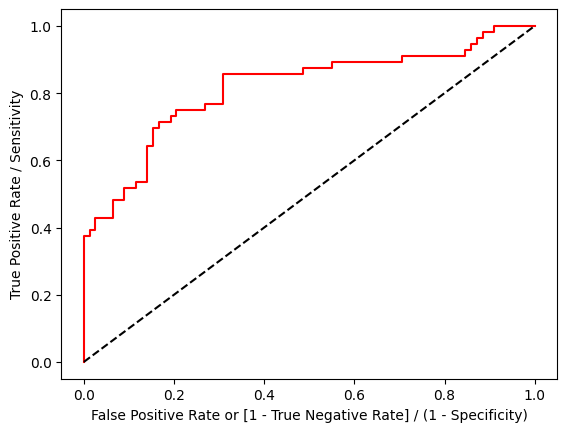

In [45]:
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate] / (1 - Specificity)')
plt.ylabel('True Positive Rate / Sensitivity')
plt.show()

In [46]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2


In [47]:
c = 0
for i in titanic['Survived']:
    if i==1:
        c+=1
c/len(titanic)

0.3838383838383838

In [48]:
print("No of First Class Passengers Who Survived: ",len(titanic[(titanic['Survived'] == 1) & (titanic['Pclass'] == 1)]))
print("No of Second Class Passengers Who Survived: ",len(titanic[(titanic['Survived'] == 1) & (titanic['Pclass'] == 2)]))
print("No of Third Class Passengers Who Survived: ",len(titanic[(titanic['Survived'] == 1) & (titanic['Pclass'] == 3)]))

No of First Class Passengers Who Survived:  136
No of Second Class Passengers Who Survived:  87
No of Third Class Passengers Who Survived:  119


In [49]:
# Identify outliers using IQR for 'Age' and 'Fare'
Q1_age = titanic['Age'].quantile(0.25)
Q3_age = titanic['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

In [50]:
Q1_fare = titanic['Fare'].quantile(0.25)
Q3_fare = titanic['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare

In [51]:
# Cap outliers by replacing values outside the bounds
titanic['Age'] = np.where(titanic['Age'] < lower_bound_age, lower_bound_age, titanic['Age'])
titanic['Age'] = np.where(titanic['Age'] > upper_bound_age, upper_bound_age, titanic['Age'])

titanic['Fare'] = np.where(titanic['Fare'] < lower_bound_fare, lower_bound_fare, titanic['Fare'])
titanic['Fare'] = np.where(titanic['Fare'] > upper_bound_fare, upper_bound_fare, titanic['Fare'])

In [52]:
# After handling outliers, you would retrain your model
# Assuming you have already defined X and y
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

log_reg_outliers_handled = LogisticRegression()
log_reg_outliers_handled.fit(X_train, y_train)

LogisticRegression()

In [53]:
# Evaluate the model performance after handling outliers
y_pred_outliers_handled = log_reg_outliers_handled.predict(X_test)
print("Accuracy Score after handling outliers:", accuracy_score(y_test, y_pred_outliers_handled))
print(classification_report(y_test, y_pred_outliers_handled))
print("Confusion Matrix after handling outliers:\n", confusion_matrix(y_test, y_pred_outliers_handled))
print("ROC-AUC score after handling outliers:", roc_auc_score(y_test, y_pred_outliers_handled))

Accuracy Score after handling outliers: 0.7686567164179104
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        78
           1       0.76      0.66      0.70        56

    accuracy                           0.77       134
   macro avg       0.77      0.75      0.76       134
weighted avg       0.77      0.77      0.77       134

Confusion Matrix after handling outliers:
 [[66 12]
 [19 37]]
ROC-AUC score after handling outliers: 0.7534340659340659


In [54]:
import pickle
with open('log_reg.pkl', 'wb') as f:
    pickle.dump(log_reg, f)

In [55]:
! git clone https://github.com/bhagathsinghbanoth/ASSIGNMENT-7.git

Cloning into 'ASSIGNMENT-7'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 13 (delta 2), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (13/13), 181.83 KiB | 1.29 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [56]:
# Calculate the correlation matrix
corr_matrix = titanic.corr()

In [57]:
# Set a threshold for high correlation
threshold = 0.8

In [58]:
# Find pairs of highly correlated features
highly_correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname_i = corr_matrix.columns[i]
            colname_j = corr_matrix.columns[j]
            highly_correlated_features.add((colname_i, colname_j))


In [59]:
# Print the highly correlated feature pairs
print("Highly correlated features (correlation > {}):".format(threshold))
for pair in highly_correlated_features:
    print(pair)


Highly correlated features (correlation > 0.8):


In [60]:
# Decide which feature to drop from a highly correlated pair (example)
# This is a simplified example, in a real scenario you would make a more informed decision
features_to_drop = []
for pair in highly_correlated_features:
    # Assuming you want to drop the second feature in the pair
    features_to_drop.append(pair[1])

In [61]:
# prompt: # After dropping features, you would retrain your model

# Drop the highly correlated features from the DataFrame
X_dropped = X.drop(columns=features_to_drop, errors='ignore')

# Split the data again with the reduced feature set
X_train_dropped, X_test_dropped, y_train_dropped, y_test_dropped = train_test_split(X_dropped, y, test_size=0.15, random_state=42)

# Retrain the Logistic Regression model
log_reg_dropped = LogisticRegression()
log_reg_dropped.fit(X_train_dropped, y_train_dropped)

# Evaluate the model performance after dropping features
y_pred_dropped = log_reg_dropped.predict(X_test_dropped)

print("Accuracy Score after dropping highly correlated features:", accuracy_score(y_test_dropped, y_pred_dropped))
print(classification_report(y_test_dropped, y_pred_dropped))
print("Confusion Matrix after dropping highly correlated features:\n", confusion_matrix(y_test_dropped, y_pred_dropped))
print("ROC-AUC score after dropping highly correlated features:", roc_auc_score(y_test_dropped, y_pred_dropped))

Accuracy Score after dropping highly correlated features: 0.7686567164179104
              precision    recall  f1-score   support

           0       0.78      0.85      0.81        78
           1       0.76      0.66      0.70        56

    accuracy                           0.77       134
   macro avg       0.77      0.75      0.76       134
weighted avg       0.77      0.77      0.77       134

Confusion Matrix after dropping highly correlated features:
 [[66 12]
 [19 37]]
ROC-AUC score after dropping highly correlated features: 0.7534340659340659


In [62]:
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 112.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 9.5 MB/s eta 0:00:00


In [75]:
import streamlit as st
st.title("My App")
st.write("Hello, world!")

2025-06-05 14:57:40.438 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 14:57:40.440 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 14:57:40.442 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 14:57:40.442 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [77]:
import streamlit as st
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import pickle

# Load the dataset
train_df = pd.read_csv(r"Titanic_train.csv")

# Define a function to preprocess the data
def preprocess_data(df):
    # Handle missing values in 'Embarked' column
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

    # Convert 'Sex' and 'Embarked' into numerical values using LabelEncoder
    le = LabelEncoder()
    df['Sex'] = le.fit_transform(df['Sex'])
    df['Embarked'] = le.fit_transform(df['Embarked'])

    # Drop irrelevant features
    df = df.drop(['Ticket', 'Cabin', 'Name'], axis=1)

    return df

# Preprocess the data
train_df = preprocess_data(train_df)

X = train_df.drop(['Survived'], axis=1)
y = train_df['Survived']

# Impute missing values in numerical columns
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Standardize the features (Optional but recommended for logistic regression)
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save the trained model
pickle.dump(model, open('logistic_regression_model.pkl', 'wb'))

# Load the trained model
loaded_model = pickle.load(open('logistic_regression_model.pkl', 'rb'))

# Create a Streamlit app
st.title('Titanic Survival Prediction')
st.write('Please enter the following features to make a prediction:')

# Define the input fields
pclass = st.selectbox('Pclass', [1, 2, 3])
sex = st.selectbox('Sex', ['Male', 'Female'])
age = st.number_input('Age', min_value=0.0, max_value=100.0, value=30.0)
sibsp = st.number_input('SibSp', min_value=0, max_value=8, value=0)
parch = st.number_input('Parch', min_value=0, max_value=6, value=0)
fare = st.number_input('Fare', min_value=0.0, max_value=500.0, value=32.0)
embarked = st.selectbox('Embarked', ['C', 'Q', 'S'])
passenger_id = st.number_input('PassengerId', min_value=1, max_value=1000, value=1)

# Convert categorical inputs to numeric
sex = 1 if sex == 'Male' else 0
embarked = {'C': 0, 'Q': 1, 'S': 2}[embarked]

# Create a dataframe with the user input features
input_df = pd.DataFrame({
    'PassengerId': [passenger_id],
    'Pclass': [pclass],
    'Sex': [sex],
    'Age': [age],
    'SibSp': [sibsp],
    'Parch': [parch],
    'Fare': [fare],
    'Embarked': [embarked]
})

# Preprocess the input data (Impute missing values and scale)
input_df = pd.DataFrame(imputer.transform(input_df), columns=input_df.columns)
input_df = pd.DataFrame(scaler.transform(input_df), columns=input_df.columns)

# Make a prediction using the loaded model
prediction = loaded_model.predict(input_df)

# Display the prediction
st.write('Prediction:', 'Survived' if prediction[0] == 1 else 'Not Survived')

2025-06-05 15:01:20.573 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 15:01:20.574 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 15:01:20.575 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 15:01:20.576 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 15:01:20.577 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 15:01:20.578 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 15:01:20.580 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-05 15:01:20.581 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [80]:
# https://github.com/pranay1236/7-assignment.git/blob/main/streamlit_app.py

In [79]:
#https://7-assignment-azmzt2qfypwpwng8caxwns.streamlit.app/

Precision is the ratio of correctly predicted positive observations to the total predicted positives, while recall is the ratio of correctly predicted positives to all actual positives.

In simple terms:

**Precision** = TP / (TP + FP) → How accurate positive predictions are

**Recall** = TP / (TP + FN) → How well all actual positives are captured

Cross-validation is a technique used to evaluate a model's performance by dividing the dataset into multiple subsets (folds), training the model on some folds, and testing it on the remaining fold(s). This process is repeated several times to ensure a robust estimate of model accuracy.

In binary classification, it's important because it:

Reduces the risk of overfitting

Ensures the model generalizes well to unseen data

Provides a more reliable performance estimate than a single train-test split